In [1]:
import pandas as pd
df = pd.read_csv('/content/Admission_Predict.csv')

In [2]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.drop(columns=['Serial No.'],inplace=True)

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [7]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [8]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
395,0.82
396,0.84
397,0.91
398,0.67


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_trf = scaler.fit_transform(x_train)
x_test_trf = scaler.fit_transform(x_test)

In [13]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [28]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(14,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [31]:
history = model.fit(x_train_trf,y_train,epochs=250,validation_split=0.25)

Epoch 1/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.6622 - val_loss: 0.6455
Epoch 2/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5562 - val_loss: 0.5233
Epoch 3/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4494 - val_loss: 0.4152
Epoch 4/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3506 - val_loss: 0.3181
Epoch 5/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2697 - val_loss: 0.2338
Epoch 6/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1980 - val_loss: 0.1636
Epoch 7/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1373 - val_loss: 0.1073
Epoch 8/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0941 - val_loss: 0.0682
Epoch 9/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0640 - val_loss: 0.0439
Epoch 10/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0411 - val_loss: 0.0335
Epoch 11/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0284 - val_loss: 0.0301
Epoch 12/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0284 - val_loss: 0.0288

In [33]:
y_pred = model.predict(x_test_trf)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [34]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7941110925256311

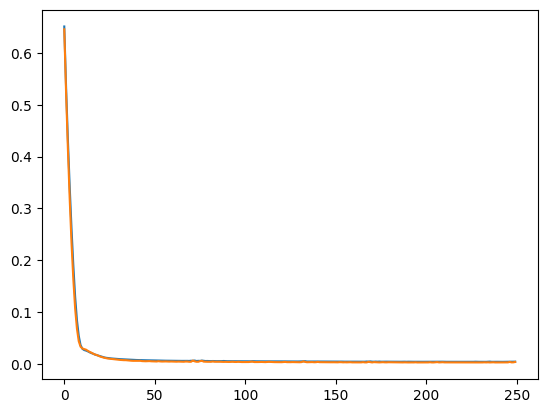

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])